In [1]:
import torch
from transformers import RobertaModel, RobertaConfig
from transformers import BartModel

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

model_name_or_path = "../pretrained_models/roberta"
# model_name_or_path = "./pretrained_models/bart"
model = RobertaModel.from_pretrained(model_name_or_path)
config = RobertaConfig.from_pretrained(model_name_or_path)

/root/miniconda3/envs/ilra/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([768, 3072])

In [75]:
from typing import List

def plot_roberta_significance(layers: List[int], module: str, mode: str, dim: int):
    """_summary_

    Args:
        layer (int): layer id must in [0, 11]
        module (str): must in ['query', 'key', 'value', 'output', 'ffn1, ffn2']
        mode (str): must in ['multi', 'single']
        dim (int): dimension of PCA
    """
    assert module in ['query', 'key', 'value', 'output', 'ffn1', 'ffn2'], "module must in ['query', 'key', 'value', 'output', 'ffn1', 'ffn2']"
    for ly in layers:
        assert ly in range(12), "layer id must in [0, 11]"
    assert mode in ['multi', 'single'], "mode must in ['multi', 'single']"
    
    plt.figure(figsize=(16, 10))
    # 隐藏画布刻度
    plt.xticks([])
    plt.yticks([])
    # plt.tick_params(axis='both', which='both', bottom=False, left=False, top=False, right=False, labelbottom=False, labelleft=False, labeltop=False, labelright=False, length=0)
    pca = PCA(n_components=dim)
    
    if module == 'query':
        plt.title(f'Variance ratio of Query Matrix')
        for idx, ly in enumerate(layers):
            matrix = model.encoder.layer[ly].attention.self.query.weight.detach().numpy()
            pca.fit(matrix)
            yy = pca.explained_variance_ratio_
            xx = range(dim)
            if mode == 'multi':
                plt.subplot(3, 4, idx+1, label=f'Layer {ly}')
                plt.plot(xx, yy, label=f'Layer {ly}')
                plt.legend()
            else:
                plt.plot(xx, yy, label=f'Layer {ly}')
                plt.legend()
    elif module == 'key':
        plt.title(f'Variance ratio of Key Matrix')
        for idx, ly in enumerate(layers):
            matrix = model.encoder.layer[ly].attention.self.key.weight.detach().numpy()
            pca.fit(matrix)
            yy = pca.explained_variance_ratio_
            xx = range(dim)
            if mode == 'multi':
                plt.subplot(3, 4, idx+1, label=f'Layer {ly}')
                plt.plot(xx, yy, label=f'Layer {ly}')
                plt.legend()
            else:
                plt.plot(xx, yy, label=f'Layer {ly}')
                plt.legend()
    elif module == 'value':
        plt.title(f'Variance ratio of Value Matrix')
        for idx, ly in enumerate(layers):
            matrix = model.encoder.layer[ly].attention.self.value.weight.detach().numpy()
            pca.fit(matrix)
            yy = pca.explained_variance_ratio_
            xx = range(dim)
            if mode == 'multi':
                plt.subplot(3, 4, idx+1, label=f'Layer {ly}')
                plt.plot(xx, yy, label=f'Layer {ly}', color='#2878b5')
                plt.xlabel("pca dim")
                plt.ylabel("pca variance ratio")
                plt.legend()
            else:
                plt.plot(xx, yy, label=f'Layer {ly}')
                plt.legend()
    elif module == 'output':
        plt.title(f'Variance ratio of output Matrix')
        for idx, ly in enumerate(layers):
            matrix = model.encoder.layer[ly].attention.output.dense.weight.detach().numpy()
            pca.fit(matrix)
            yy = pca.explained_variance_ratio_
            xx = range(dim)
            if mode == 'multi':
                plt.subplot(3, 4, idx+1, label=f'Layer {ly}')
                plt.plot(xx, yy, label=f'Layer {ly}')
                plt.legend()
            else:
                plt.plot(xx, yy, label=f'Layer {ly}')
                plt.legend()
    elif module == 'ffn1':
        plt.title(f'Variance ratio of ffn1 Matrix')
        for idx, ly in enumerate(layers):
            matrix = model.encoder.layer[ly].intermediate.dense.weight.detach().numpy()
            pca.fit(matrix)
            yy = pca.explained_variance_ratio_
            xx = range(dim)
            if mode == 'multi':
                plt.subplot(3, 4, idx+1, label=f'Layer {ly}')
                plt.plot(xx, yy, label=f'Layer {ly}')
                plt.legend()
            else:
                plt.plot(xx, yy, label=f'Layer {ly}')
                plt.legend()
    elif module == 'ffn2':
        plt.title(f'Variance ratio of ffn2 Matrix')
        for idx, ly in enumerate(layers):
            matrix = model.encoder.layer[ly].output.dense.weight.detach().numpy()
            pca.fit(matrix)
            yy = pca.explained_variance_ratio_
            xx = range(dim)
            if mode == 'multi':
                plt.subplot(3, 4, idx+1, label=f'Layer {ly}')
                plt.plot(xx, yy, label=f'Layer {ly}')
                plt.legend()
            else:
                plt.plot(xx, yy, label=f'Layer {ly}')
                plt.legend()


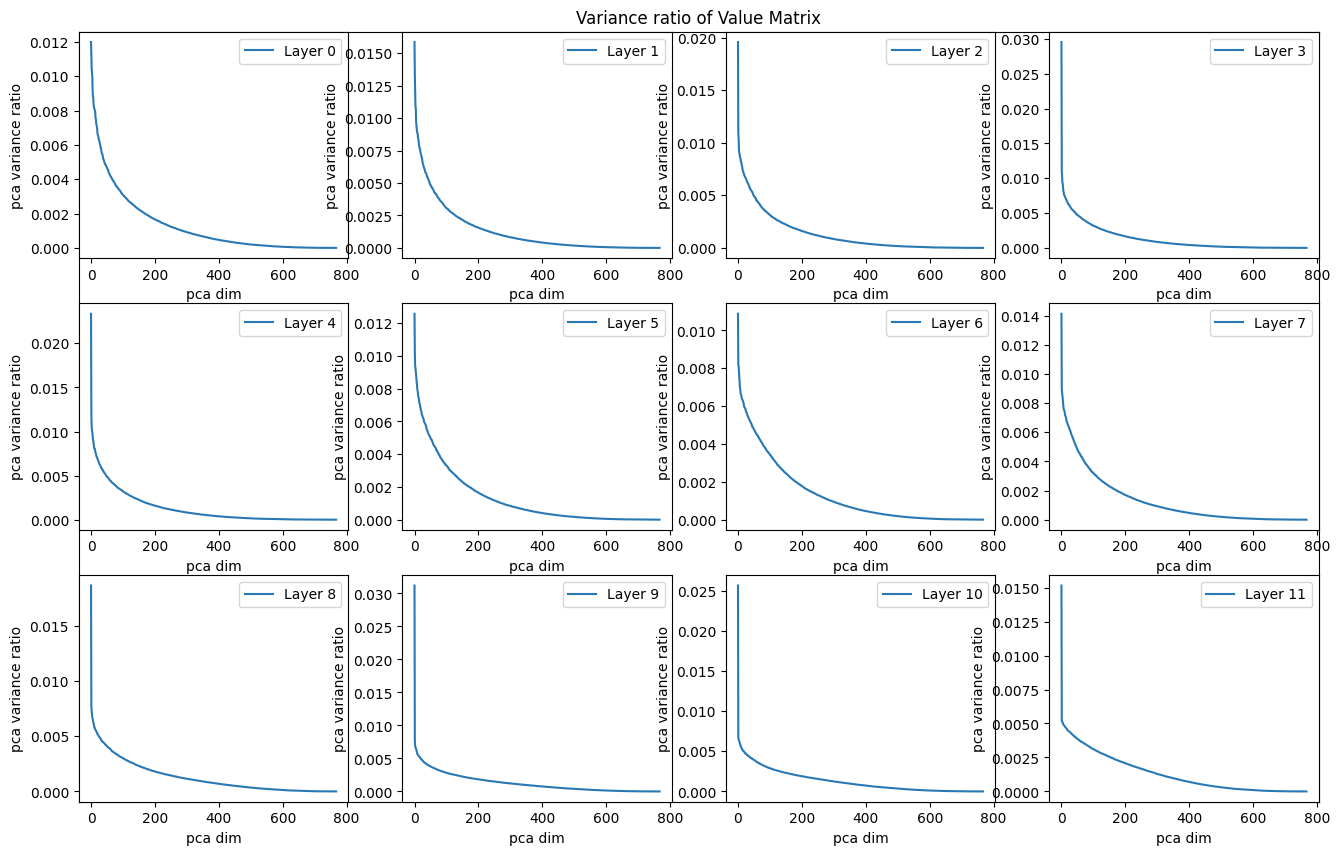

In [76]:
layers = list(range(12))
module = 'value'
mode = 'multi'
dim = 768
plot_roberta_significance(layers, module, mode, dim)


In [77]:
from typing import List

def plot_roberta_significance_diff1(layers: List[int], module: str, mode: str, dim: int):
    """_summary_

    Args:
        layer (int): layer id must in [0, 11]
        module (str): must in ['query', 'key', 'value', 'output', 'ffn1, ffn2']
        mode (str): must in ['multi', 'single']
        dim (int): dimension of PCA
    """
    assert module in ['query', 'key', 'value', 'output', 'ffn1', 'ffn2'], "module must in ['query', 'key', 'value', 'output', 'ffn1', 'ffn2']"
    for ly in layers:
        assert ly in range(12), "layer id must in [0, 11]"
    assert mode in ['multi', 'single'], "mode must in ['multi', 'single']"
    
    plt.figure(figsize=(12, 8))
    # 隐藏画布刻度
    plt.xticks([])
    plt.yticks([])
    # plt.tick_params(axis='both', which='both', bottom=False, left=False, top=False, right=False, labelbottom=False, labelleft=False, labeltop=False, labelright=False, length=0)
    pca = PCA(n_components=dim)
    x_dim = 2
    y_dim = 2
    
    if module == 'query':
        plt.title(f"PCA's variance ratio diff of Query Matrix")
        for idx, ly in enumerate(layers):
            matrix = model.encoder.layer[ly].attention.self.query.weight.detach().numpy()
            pca.fit(matrix)
            yy = pca.explained_variance_ratio_
            yy_diff = yy[1:] - yy[:-1]
            for j in range(len(yy_diff)-1):
                if yy_diff[j+1] / yy_diff[j] < 1/5:
                    start_idx = j
                    break
            
            mean_val = np.mean(yy_diff[start_idx:])
              
            for j in range(start_idx, len(yy_diff)):
                if yy_diff[j] >= mean_val:
                    pca_dim = j
                    break
            
            mean_val = np.mean(yy_diff[pca_dim:])
                   
            xx = range(len(yy_diff))
            if mode == 'multi':
                plt.subplot(x_dim, y_dim, idx+1)
                plt.plot(xx, yy_diff, label=f'Variance Ratio Diff in Layer {ly}', color='#2878b5')
                plt.axhline(y=mean_val, color='#ff8884', label=f'Mean Variance Ratio', linestyle='--') 
                plt.axvline(x=pca_dim, color='#FFBE7A', label=f'Possible Intrinsic Dimension', linestyle='--')
                plt.xlabel("pca dim")
                plt.ylabel("pca variance ratio diff")
                plt.legend(loc="lower right")
            else:
                plt.plot(xx, yy_diff, label=f'Layer {ly}')
                plt.legend()
    elif module == 'key':
        plt.title(f"PCA's variance ratio diff of Key Matrix")
        for idx, ly in enumerate(layers):
            matrix = model.encoder.layer[ly].attention.self.key.weight.detach().numpy()
            pca.fit(matrix)
            yy = pca.explained_variance_ratio_
            yy_diff = yy[1:] - yy[:-1]
            xx = range(len(yy_diff))
            if mode == 'multi':
                plt.subplot(x_dim, y_dim, idx+1, label=f'Layer {ly}')
                plt.plot(xx, yy_diff, label=f'Layer {ly}')
                plt.legend()
            else:
                plt.plot(xx, yy_diff, label=f'Layer {ly}')
                plt.legend()
    elif module == 'value':
        plt.title(f"PCA's variance ratio diff of Value Matrix")
        for idx, ly in enumerate(layers):
            matrix = model.encoder.layer[ly].attention.self.value.weight.detach().numpy()
            pca.fit(matrix)
            yy = pca.explained_variance_ratio_
            yy_diff = yy[1:] - yy[:-1]
            xx = range(len(yy_diff))
            if mode == 'multi':
                plt.subplot(x_dim, y_dim, idx+1, label=f'Layer {ly}')
                plt.plot(xx, yy_diff, label=f'Layer {ly}')
                plt.legend()
            else:
                plt.plot(xx, yy_diff, label=f'Layer {ly}')
                plt.legend()
    elif module == 'output':
        plt.title(f"PCA's variance ratio diff of Output Matrix")
        for idx, ly in enumerate(layers):
            matrix = model.encoder.layer[ly].attention.output.dense.weight.detach().numpy()
            pca.fit(matrix)
            yy = pca.explained_variance_ratio_
            yy_diff = yy[1:] - yy[:-1]
            xx = range(len(yy_diff))
            if mode == 'multi':
                plt.subplot(x_dim, y_dim, idx+1, label=f'Layer {ly}')
                plt.plot(xx, yy_diff, label=f'Layer {ly}')
                plt.legend()
            else:
                plt.plot(xx, yy_diff, label=f'Layer {ly}')
                plt.legend()
    elif module == 'ffn1':
        plt.title(f"PCA's variance ratio diff of FFN1 Matrix")
        for idx, ly in enumerate(layers):
            matrix = model.encoder.layer[ly].intermediate.dense.weight.detach().numpy()
            pca.fit(matrix)
            yy = pca.explained_variance_ratio_
            yy_diff = yy[1:] - yy[:-1]
            xx = range(len(yy_diff))
            if mode == 'multi':
                plt.subplot(x_dim, y_dim, idx+1, label=f'Layer {ly}')
                plt.plot(xx, yy_diff, label=f'Layer {ly}')
                plt.legend()
            else:
                plt.plot(xx, yy_diff, label=f'Layer {ly}')
                plt.legend()
    elif module == 'ffn2':
        plt.title(f"PCA's variance ratio diff of FFN2 Matrix")
        for idx, ly in enumerate(layers):
            matrix = model.encoder.layer[ly].output.dense.weight.detach().numpy()
            pca.fit(matrix)
            yy = pca.explained_variance_ratio_
            yy_diff = yy[1:] - yy[:-1]
            xx = range(len(yy_diff))
            if mode == 'multi':
                plt.subplot(x_dim, y_dim, idx+1, label=f'Layer {ly}')
                plt.plot(xx, yy_diff, label=f'Layer {ly}')
                plt.legend()
            else:
                plt.plot(xx, yy_diff, label=f'Layer {ly}')
                plt.legend()


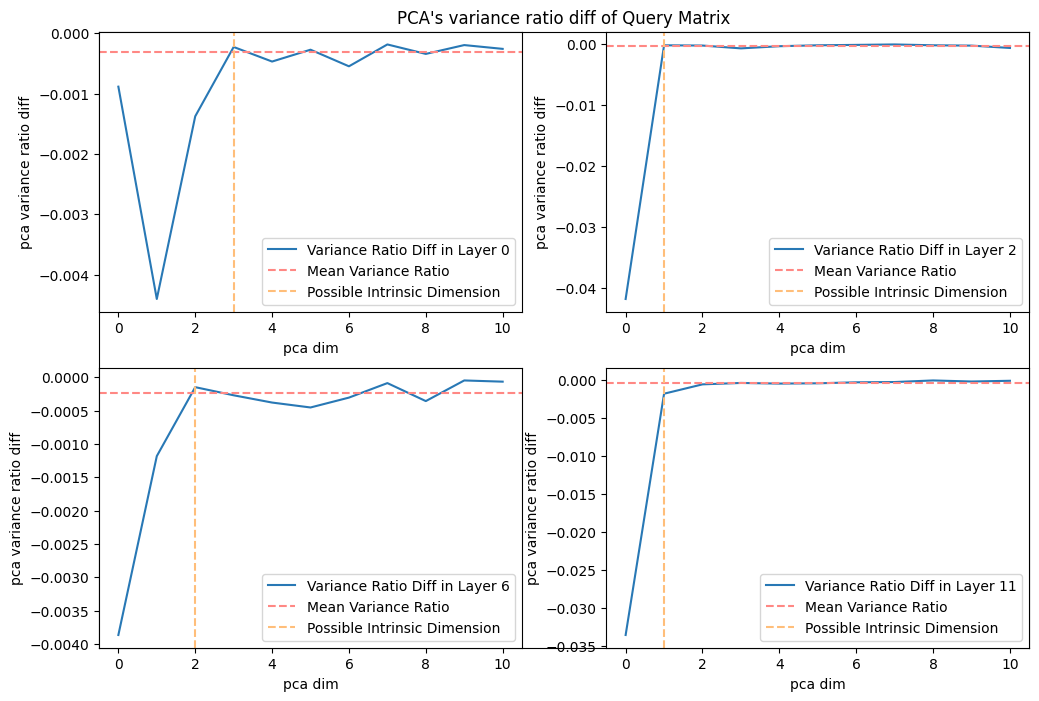

In [78]:
layers = [0, 2, 6, 11]
module = 'query'
mode = 'multi'
dim = 12
plot_roberta_significance_diff1(layers, module, mode, dim)


In [50]:
from typing import List

def plot_roberta_significance_diff2(layers: List[int], module: str, mode: str, dim: int):
    """_summary_

    Args:
        layer (int): layer id must in [0, 11]
        module (str): must in ['query', 'key', 'value', 'output', 'ffn1, ffn2']
        mode (str): must in ['multi', 'single']
        dim (int): dimension of PCA
    """
    assert module in ['query', 'key', 'value', 'output', 'ffn1', 'ffn2'], "module must in ['query', 'key', 'value', 'output', 'ffn1', 'ffn2']"
    for ly in layers:
        assert ly in range(12), "layer id must in [0, 11]"
    assert mode in ['multi', 'single'], "mode must in ['multi', 'single']"
    
    plt.figure(figsize=(16, 10))
    # 隐藏画布刻度
    plt.xticks([])
    plt.yticks([])
    # plt.tick_params(axis='both', which='both', bottom=False, left=False, top=False, right=False, labelbottom=False, labelleft=False, labeltop=False, labelright=False, length=0)
    pca = PCA(n_components=dim)
    
    if module == 'query':
        plt.title(f"PCA's variance ratio diff of Query Matrix")
        for idx, ly in enumerate(layers):
            visual_idx = 0
            matrix = model.encoder.layer[ly].attention.self.query.weight.detach().numpy()
            pca.fit(matrix)
            yy = pca.explained_variance_ratio_
            yy_diff = yy[1:] - yy[:-1]
            visual_num = yy_diff[1:] - yy_diff[:-1]
            for i, n in enumerate(visual_num):
                if n < 0:
                    visual_idx = i
                    break
            xx = range(len(yy_diff))
            if mode == 'multi':
                plt.subplot(3, 4, idx+1, label=f'Layer {ly}')
                plt.axvline(x=visual_idx, color='r', label=f' dim={visual_idx+1}')  
                plt.plot(xx, yy_diff, label=f'Layer {ly}')
                plt.legend()
            else:
                plt.plot(xx, yy_diff, label=f'Layer {ly}')
                plt.legend()
    elif module == 'key':
        plt.title(f"PCA's variance ratio diff of Key Matrix")
        for idx, ly in enumerate(layers):
            visual_idx = 0
            matrix = model.encoder.layer[ly].attention.self.key.weight.detach().numpy()
            pca.fit(matrix)
            yy = pca.explained_variance_ratio_
            yy_diff = yy[1:] - yy[:-1]
            visual_num = yy_diff[1:] - yy_diff[:-1]
            for i, n in enumerate(visual_num):
                if n < 0:
                    visual_idx = i
                    break
            xx = range(len(yy_diff))
            if mode == 'multi':
                plt.subplot(3, 4, idx+1, label=f'Layer {ly}')
                plt.axvline(x=visual_idx, color='r', label=f' dim={visual_idx+1}')  
                plt.plot(xx, yy_diff, label=f'Layer {ly}')
                plt.legend()
            else:
                plt.plot(xx, yy_diff, label=f'Layer {ly}')
                plt.legend()
    elif module == 'value':
        plt.title(f"PCA's variance ratio diff of Value Matrix")
        for idx, ly in enumerate(layers):
            visual_idx = 0
            matrix = model.encoder.layer[ly].attention.self.value.weight.detach().numpy()
            pca.fit(matrix)
            yy = pca.explained_variance_ratio_
            yy_diff = yy[1:] - yy[:-1]
            visual_num = yy_diff[1:] - yy_diff[:-1]
            for i, n in enumerate(visual_num):
                if n < 0:
                    visual_idx = i
                    break
            xx = range(len(yy_diff))
            if mode == 'multi':
                plt.subplot(3, 4, idx+1, label=f'Layer {ly}')
                plt.axvline(x=visual_idx, color='r', label=f' dim={visual_idx+1}')  
                plt.plot(xx, yy_diff, label=f'Layer {ly}')
                plt.legend()
            else:
                plt.plot(xx, yy_diff, label=f'Layer {ly}')
                plt.legend()
    elif module == 'output':
        plt.title(f"PCA's variance ratio diff of Output Matrix")
        for idx, ly in enumerate(layers):
            visual_idx = 0
            matrix = model.encoder.layer[ly].attention.output.dense.weight.detach().numpy()
            pca.fit(matrix)
            yy = pca.explained_variance_ratio_
            yy_diff = yy[1:] - yy[:-1]
            visual_num = yy_diff[1:] - yy_diff[:-1]
            for i, n in enumerate(visual_num):
                if n < 0:
                    visual_idx = i
                    break
            xx = range(len(yy_diff))
            if mode == 'multi':
                plt.subplot(3, 4, idx+1, label=f'Layer {ly}')
                plt.axvline(x=visual_idx, color='r', label=f' dim={visual_idx+1}')  
                plt.plot(xx, yy_diff, label=f'Layer {ly}')
                plt.legend()
            else:
                plt.plot(xx, yy_diff, label=f'Layer {ly}')
                plt.legend()
    elif module == 'ffn1':
        plt.title(f"PCA's variance ratio diff of FFN1 Matrix")
        for idx, ly in enumerate(layers):
            visual_idx = 0
            matrix = model.encoder.layer[ly].intermediate.dense.weight.detach().numpy()
            pca.fit(matrix)
            yy = pca.explained_variance_ratio_
            yy_diff = yy[1:] - yy[:-1]
            visual_num = yy_diff[1:] - yy_diff[:-1]
            for i, n in enumerate(visual_num):
                if n < 0:
                    visual_idx = i
                    break
            xx = range(len(yy_diff))
            if mode == 'multi':
                plt.subplot(3, 4, idx+1, label=f'Layer {ly}')
                plt.axvline(x=visual_idx, color='r', label=f' dim={visual_idx+1}')  
                plt.plot(xx, yy_diff, label=f'Layer {ly}')
                plt.legend()
            else:
                plt.plot(xx, yy_diff, label=f'Layer {ly}')
                plt.legend()
    elif module == 'ffn2':
        plt.title(f"PCA's variance ratio diff of FFN2 Matrix")
        for idx, ly in enumerate(layers):
            visual_idx = 0
            matrix = model.encoder.layer[ly].output.dense.weight.detach().numpy()
            pca.fit(matrix)
            yy = pca.explained_variance_ratio_
            yy_diff = yy[1:] - yy[:-1]
            visual_num = yy_diff[1:] - yy_diff[:-1]
            for i, n in enumerate(visual_num):
                if n < 0:
                    visual_idx = i
                    break
            xx = range(len(yy_diff))
            if mode == 'multi':
                plt.subplot(3, 4, idx+1, label=f'Layer {ly}')
                plt.axvline(x=visual_idx, color='r', label=f' dim={visual_idx+1}')  
                plt.plot(xx, yy_diff, label=f'Layer {ly}')
                plt.legend()
            else:
                plt.plot(xx, yy_diff, label=f'Layer {ly}')
                plt.legend()


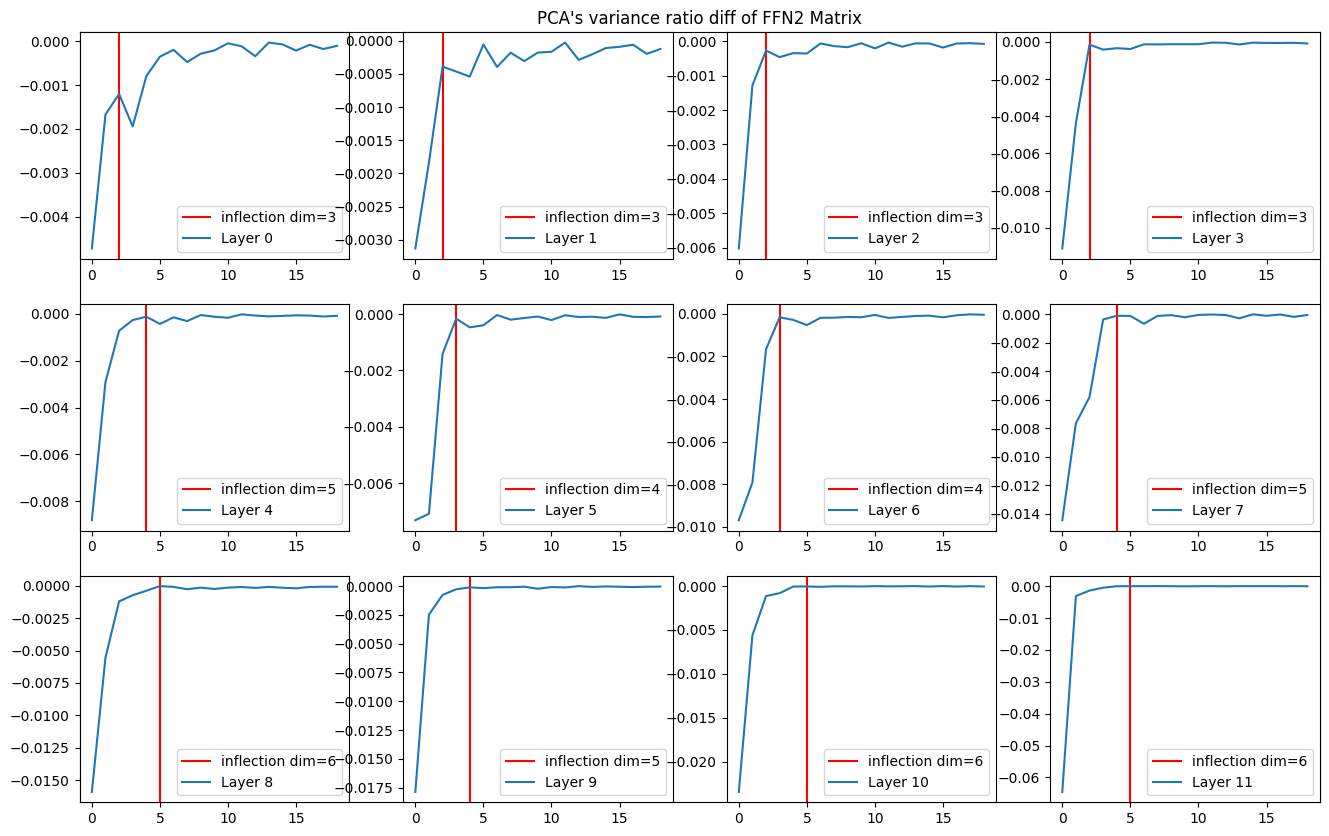

In [54]:
layers = list(range(12))
module = 'ffn2'
mode = 'multi'
dim = 20
plot_roberta_significance_diff2(layers, module, mode, dim)
